<h1>Number of Students by Higher Education provider</h1>
<p>In these notes we look at creating a scatter plot based on a set of data.  We have a datafile named numberOfStudentsFull_18_19.csv (available on blackboard).</p>
<p>Datafile provided by HESA, available at: <a href="https://www.hesa.ac.uk/data-and-analysis/students/table-1"> Original Datafile </a></p>
<p>
Our task is to read the contents of the file into a data frame and to create a scatter plot that shows the number of male students vs the number of female students for each institution.
</p>

<h2>Import PANDAs and Matplotlib.pylot</h2>
<p>You will be using the pandas DataFrame to store the data and Matplotlib pyplot to plot the data.  Import the necessary libraries</h2>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

<h2>Read the data into a PANDAs DataFrame</h2>
<p>Read the 'numberOfStudentsFull_18_19.csv' into a DataFrame called df, use the head method to output the first 20 rows of the datafile so that the structure of the DataFrame can be explored.</p>
<p>Try to identify where the column headings start within the datafile.  Adjust the read_csv paramters to skip past the summary information so that the columns within the datafile are the columns within the DataFrame</p>

In [4]:
df = pd.read_csv('numberOfStudentsFull_18_19.csv', skiprows=14)
df

,UKPRN,HE provider,Country of HE provider,Region of HE provider,First year marker,Level of study,Mode of study,Academic Year,Category marker,Category,Number
0,10007783.0,The University of Aberdeen,All,All,All,All,All,2018/19,Sex,Female,8640
1,10007783.0,The University of Aberdeen,All,All,All,All,All,2018/19,Sex,Male,6135
2,10007783.0,The University of Aberdeen,All,All,All,All,All,2018/19,Sex,Other,0
3,10007783.0,The University of Aberdeen,All,All,All,All,All,2018/19,Domicile,England,1435
4,10007783.0,The University of Aberdeen,All,All,All,All,All,2018/19,Domicile,Scotland,7880
...,...,...,...,...,...,...,...,...,...,...,...
575157,NaN,Total,Wales,Wales,Other years,All undergraduate,Part-time,2018/19,Domicile,Other European Union,65
575158,NaN,Total,Wales,Wales,Other years,All undergraduate,Part-time,2018/19,Domicile,Non-European Union,130
575159,NaN,Total,Wales,Wales,Other years,All undergraduate,Part-time,2018/19,Domicile,Total Non-UK,195
575160,NaN,Total,Wales,Wales,Other years,All undergraduate,Part-time,2018/19,Domicile,Not known,0


<h2>Filter the Data</h2>
<p>Filter the data within the DataFrame. You want to show the total number of Female, Male and Other sex students that are studying an undergraduate degree full-time, for each HE provider.
You are also interested in the Country of HE provider. Make a copy of the original DataFrame into a new DataFrame named df2 just in case you make a mistake - use the copy method.
</p>
<p>Resulting Dataframe Output</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>HE provider</th>
      <th>Country of HE provider</th>
      <th>Category</th>
      <th>Number</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>492450</td>
      <td>The University of Aberdeen</td>
      <td>Scotland</td>
      <td>Female</td>
      <td>5620</td>
    </tr>
    <tr>
      <td>492451</td>
      <td>The University of Aberdeen</td>
      <td>Scotland</td>
      <td>Male</td>
      <td>4085</td>
    </tr>
    <tr>
      <td>492452</td>
      <td>The University of Aberdeen</td>
      <td>Scotland</td>
      <td>Other</td>
      <td>0</td>
    </tr>
    <tr>
      <td>492954</td>
      <td>University of Abertay Dundee</td>
      <td>Scotland</td>
      <td>Female</td>
      <td>1775</td>
    </tr>
    <tr>
      <td>492955</td>
      <td>University of Abertay Dundee</td>
      <td>Scotland</td>
      <td>Male</td>
      <td>1895</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>570767</td>
      <td>York St John University</td>
      <td>England</td>
      <td>Male</td>
      <td>1920</td>
    </tr>
    <tr>
      <td>570768</td>
      <td>York St John University</td>
      <td>England</td>
      <td>Other</td>
      <td>0</td>
    </tr>
    <tr>
      <td>571270</td>
      <td>The University of York</td>
      <td>England</td>
      <td>Female</td>
      <td>7460</td>
    </tr>
    <tr>
      <td>571271</td>
      <td>The University of York</td>
      <td>England</td>
      <td>Male</td>
      <td>6095</td>
    </tr>
    <tr>
      <td>571272</td>
      <td>The University of York</td>
      <td>England</td>
      <td>Other</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

In [5]:
df2 = df.copy()
mask = (df2['Category'] == 'Male') | (df2['Category'] == 'Female') | (df2['Category'] == 'Other')
df2 = df2[mask]
df2 = df2[df2['Mode of study'] == 'Full-time']
df2 = df2[df2['Level of study'] == 'All undergraduate']
df2 = df2[df2['Country of HE provider'] != 'All']
df2 = df2[df2['Region of HE provider'] == 'All']
df2 = df2[df2['First year marker'] == 'All']
df2 = df2[df2['HE provider'] != 'Total']
df2 = df2.drop(columns=['Academic Year', 'UKPRN', 'Region of HE provider', 'First year marker', 'Level of study', 'Category marker'])
df2 = df2.drop(columns=['Mode of study'])
df2

,HE provider,Country of HE provider,Category,Number
492450,The University of Aberdeen,Scotland,Female,5620
492451,The University of Aberdeen,Scotland,Male,4085
492452,The University of Aberdeen,Scotland,Other,0
492954,University of Abertay Dundee,Scotland,Female,1775
492955,University of Abertay Dundee,Scotland,Male,1895
...,...,...,...,...
570767,York St John University,England,Male,1920
570768,York St John University,England,Other,0
571270,The University of York,England,Female,7460
571271,The University of York,England,Male,6095


<h2>A new dataframe with a different structure</h2>
<p>Create a new DataFrame named df3, this DataFrame should contain the structure so that Male, Female and Other are on a single line for each HE provider</p>
<p>Example Output</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>HE provider</th>
      <th>Country</th>
      <th>Female</th>
      <th>Male</th>
      <th>Other</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>The University of Aberdeen</td>
      <td>Scotland</td>
      <td>5620.0</td>
      <td>4085.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>1</td>
      <td>University of Abertay Dundee</td>
      <td>Scotland</td>
      <td>1775.0</td>
      <td>1895.0</td>
      <td>5.0</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Aberystwyth University</td>
      <td>Wales</td>
      <td>2900.0</td>
      <td>2785.0</td>
      <td>25.0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>AECC University College</td>
      <td>England</td>
      <td>215.0</td>
      <td>220.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>4</td>
      <td>Anglia Ruskin University</td>
      <td>England</td>
      <td>11250.0</td>
      <td>6115.0</td>
      <td>5.0</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Aston University</td>
      <td>England</td>
      <td>5365.0</td>
      <td>5585.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>6</td>
      <td>Bangor University</td>
      <td>Wales</td>
      <td>4440.0</td>
      <td>2975.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>7</td>
      <td>Bath Spa University</td>
      <td>England</td>
      <td>4055.0</td>
      <td>1885.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>8</td>
      <td>The University of Bath</td>
      <td>England</td>
      <td>5825.0</td>
      <td>7460.0</td>
      <td>10.0</td>
    </tr>
    <tr>
      <td>9</td>
      <td>University of Bedfordshire</td>
      <td>England</td>
      <td>5735.0</td>
      <td>3775.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>

In [12]:
#df3 = df2.copy()
#df3 = df3.reset_index()
#df3 = df3.drop(columns=['index'])
he = df2['HE provider'].iloc[0]
he_c = df2['Country of HE provider'].iloc[0]
df3 = pd.DataFrame()
for index, row in df2.iterrows():
    if he != row['HE provider']:
        #print([he, he_c, f_c, m_c, o_c])
        df3 = df3.append(pd.Series([he, he_c, f_c, m_c, o_c]), ignore_index=True )  
        he = row['HE provider']
        he_c = row['Country of HE provider']

    if row['Category'] == 'Female':
        f_c = row['Number']
    elif row['Category'] == 'Male':
        m_c = row['Number']
    elif row['Category'] == 'Other':
        o_c = row['Number']

df3.columns = ['HE provider', 'Country', 'Female', 'Male', 'Other']
df3.head(10)
df3

,HE provider,Country,Female,Male,Other
0,The University of Aberdeen,Scotland,5620.0,4085.0,0.0
1,University of Abertay Dundee,Scotland,1775.0,1895.0,5.0
2,Aberystwyth University,Wales,2900.0,2785.0,25.0
3,AECC University College,England,215.0,220.0,0.0
4,Anglia Ruskin University,England,11250.0,6115.0,5.0
...,...,...,...,...,...
155,The University of Winchester,England,4075.0,2015.0,15.0
156,The University of Wolverhampton,England,7725.0,4530.0,5.0
157,University of Worcester,England,5280.0,2310.0,0.0
158,Writtle University College,England,510.0,135.0,0.0


<h2>Creating Separate Dataframes</h2>
<p>Create separate DataFrames for each Country (Scotland, Wales, England and Northern Ireland) named scotland, wales, england and nireland.</p>

In [13]:
scotland = df3[df3['Country'] == 'Scotland']
wales = df3[df3['Country'] == 'Wales']
england = df3[df3['Country'] == 'England']
nireland = df3[df3['Country'] == 'Northern Ireland']

<h2>Create a Scatter Plot</h2>
<p>Create a scatter plot for the DataFrame that represents undergraduate students studying in Northern Ireland.  Plot the number of male students along the x-axis and the number of female students along the y-axis.</p>
<p>Add the following features to the plot:</p>
<ul>
<li>Title of Male vs Female</li>
<li>Figure size of 15x6 (or whatever is most appropriate for your display)</li>    
<li>y-axis named Female</li>
<li>x-axis named Male</li>
<li>Circles for each Plot, coloured red</li>
<li>With a grid</li>
</ul>
</p>

Text(0.5, 1.0, 'Male vs Female')

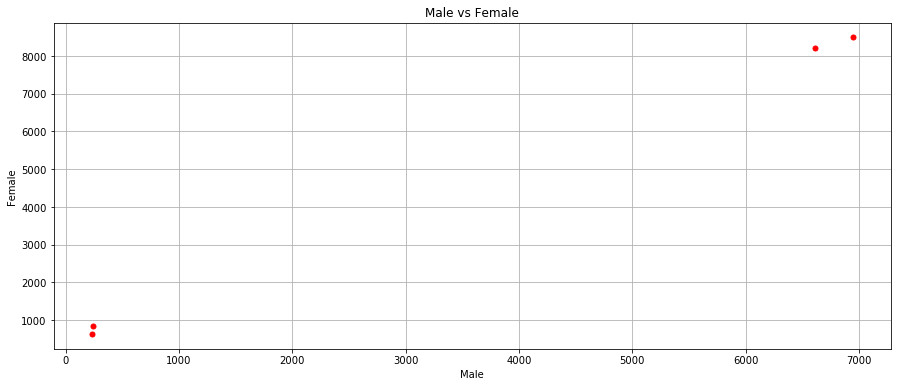

In [16]:
fig, ax = plt.subplots(figsize=(15,6))

ax.scatter(nireland['Male'],nireland['Female'],marker='.', s=100,c='r')
ax.set_ylabel('Female')
ax.set_xlabel('Male')
ax.grid(True)
plt.title('Male vs Female')

<h2>What the Plot tells you</h2>
<p>Based on your plot, complete the following statements</p>
<ul>
<li>There are 4 HE providers in Northern Ireland.</li>
<li>Two of the HE providers in Northern Ireland have over 6500 male students and over  8000 female students.</li>
<li>There are two small HE providers in Northern Ireland, each with fewer than 1000 male students.</li>
<li>At all four HE providers in Northern Ireland, there are fewer Male than Female.</li>
</ul>

<h2>Adding new Plots</h2>
<p>Add plots for the DataFrame that represent the number of students in Wales, the colour of the plots should be blue so that we can easier distinguish between the two different Countries.</p>

Text(0.5, 1.0, 'Male vs Female')

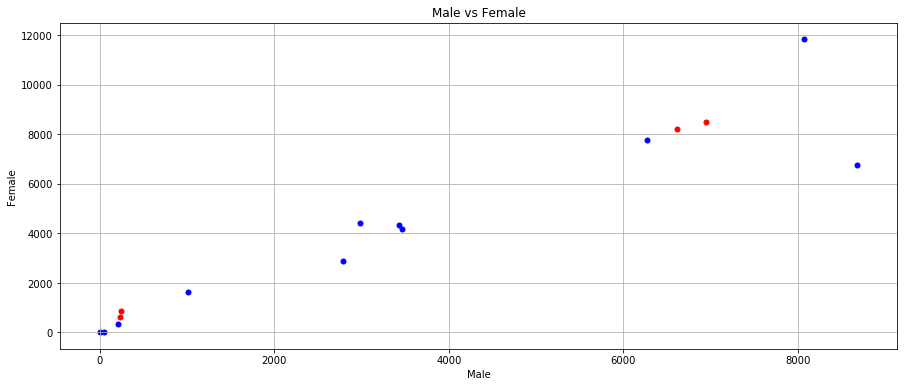

In [18]:
fig, ax = plt.subplots(figsize=(15,6))

ax.scatter(nireland['Male'],nireland['Female'],marker='.', s=100,c='r')
ax.scatter(wales['Male'],wales['Female'],marker='.',s=100,c='b')
ax.set_ylabel('Female')
ax.set_xlabel('Male')
ax.grid(True)
plt.title('Male vs Female')


<h2>What the Plot tells you</h2>
<p>Based on your plot, complete the following statements</p>
<ul>
<li>Which Country has the HE provider with the fewest students?   Wales </li>
<li>Which Country has the only HE provider with more male students than female students?  Wales, approximately how many students are there? 15000  </li>
<li>How many HE providers have less than 10,000 students? 10</li>
<li>Which Country has the most HE providers with over 8000 female students? Northern Ireland</li>
</ul>

<h2>Adding new Plots</h2>
<p>Add plots for the DataFrame that represents HE providers located in Scotland, the colour of the plots should be green.</p>

Text(0.5, 1.0, 'Male vs Female')

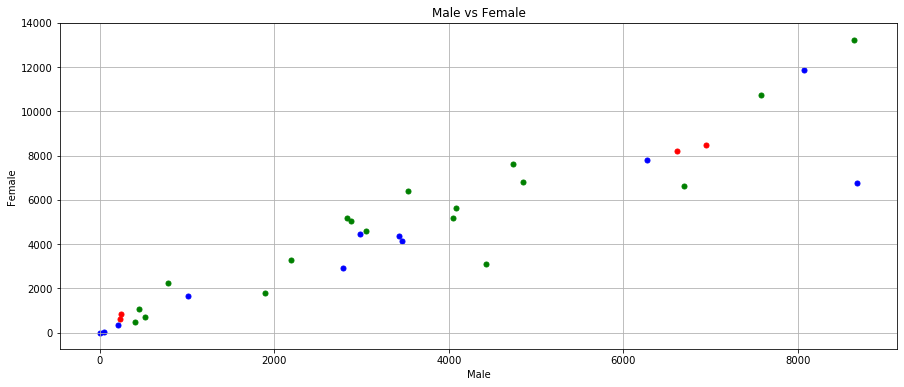

In [19]:
fig, ax = plt.subplots(figsize=(15,6))

ax.scatter(nireland['Male'],nireland['Female'],marker='.', s=100,c='r')
ax.scatter(wales['Male'],wales['Female'],marker='.',s=100,c='b')
ax.scatter(scotland['Male'],scotland['Female'],marker='.',s=100,c='g')
ax.set_ylabel('Female')
ax.set_xlabel('Male')
ax.grid(True)
plt.title('Male vs Female')

<h2>What the Plot tells you</h2>
<p>Based on your plot, complete the following statements</p>
<ul>
<li>Which Country has the most HE providers?   scotland </li>
<li>One HE provider has over 13,000 female students, and over 8000 male students. </li>
<li>scotland has more HE providers than both wales and northern ireland combined.</li>
<li>Roughly (eye balling the graph), how many HE providers have approximatley the same number of male and female students? 6</li>
</ul>

<h2>Adding new Plots</h2>
<p>Add plots for the DataFrame that represents HE providers in England, the colour of the plots should be yellow.  There will many plots, therefore plot the England data before the other data.</p>

Text(0.5, 1.0, 'Male vs Female')

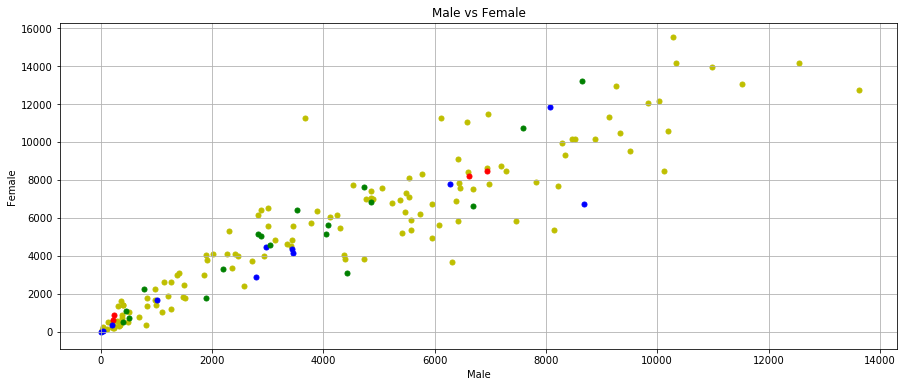

In [20]:
fig, ax = plt.subplots(figsize=(15,6))

ax.scatter(england['Male'],england['Female'],marker='.',s=100,c='y')
ax.scatter(nireland['Male'],nireland['Female'],marker='.', s=100,c='r')
ax.scatter(wales['Male'],wales['Female'],marker='.',s=100,c='b')
ax.scatter(scotland['Male'],scotland['Female'],marker='.',s=100,c='g')
ax.set_ylabel('Female')
ax.set_xlabel('Male')
ax.grid(True)
plt.title('Male vs Female')

<h2>What the Plot tells you</h2>
<p>Based on your plot, complete the following statements</p>
<ul>
<li>What is one of the obvious drawbacks with scatter plots with many points?   difficult to see </li>
<li>Approximatley how many HE providers have more than 10,000 male students? 10</li>
<li>Excluding England, in which country is there an HE provider the most female students? wales</li>
<li>Roughly (eye balling the graph), which country has an HE provider with nearly three times as many female students as male students? scotland</li>
</ul>

<h2>Export the DataFrames</h2>
<p>We will use the same data in the next set of lab notes, export DataFrames england, scotland, wales and nireland to csv files.</p>

In [21]:
england.to_csv('england.csv')
scotland.to_csv('scotland.csv')
wales.to_csv('wales.csv')
nireland.to_csv('nireland.csv')

<h2>Your Custom Plots</h2>
<p>Create your own custom plots, for example you might want to exclude all HE providers from the plot that has fewer than 500 male students and 500 female students.  Or perhaps you are only interested in the 10% of HE providers with the largest student population.  Experiment with different styles/designs of plot to really enhance them, i.e. try different plot markers and marker sizes.  Be creative and have fun. </p>